<a href="https://colab.research.google.com/github/adithya1010/100-Days-of-Code/blob/main/Unsupervised-Learning/Unsupervised_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning task

Done with inputs from Gemini 1.5 Flash

**Link to Chat:** https://getmerlin.in/share/chat/9urDZvoxR1l

**Link to Dataset:** https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

**References:**

1. https://www.kaggle.com/code/barkhadoshi/k-means-clustering-with-pca/notebook
2.  https://www.ibm.com/think/topics/principal-component-analysis
3. https://victorleungtw.com/2023/12/16/inertia/
4. https://medium.com/@abolarinwaotun/major-metrics-used-in-clustering-analysis-understanding-the-key-differences-between-inertia-75f739fd2b36
5. https://www.youtube.com/watch?v=wW1tgWtkj4I&t=65s

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Downloading and unzipping the dataset

In [ ]:
# Downloading and unzipping the dataset
!kaggle datasets download youssefaboelwafa/clustering-penguins-species
!unzip clustering-penguins-species.zip


Dataset URL: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species
License(s): GNU Lesser General Public License 3.0
  0% 0.00/2.53k [00:00<?, ?B/s]
100% 2.53k/2.53k [00:00<00:00, 3.68MB/s]
Archive:  clustering-penguins-species.zip
  inflating: penguins.csv            


## Reading the dataset

In [ ]:
penguins_data = pd.read_csv('/content/penguins.csv')
penguins_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [ ]:
penguins_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
penguins_data.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


**Culmen:**

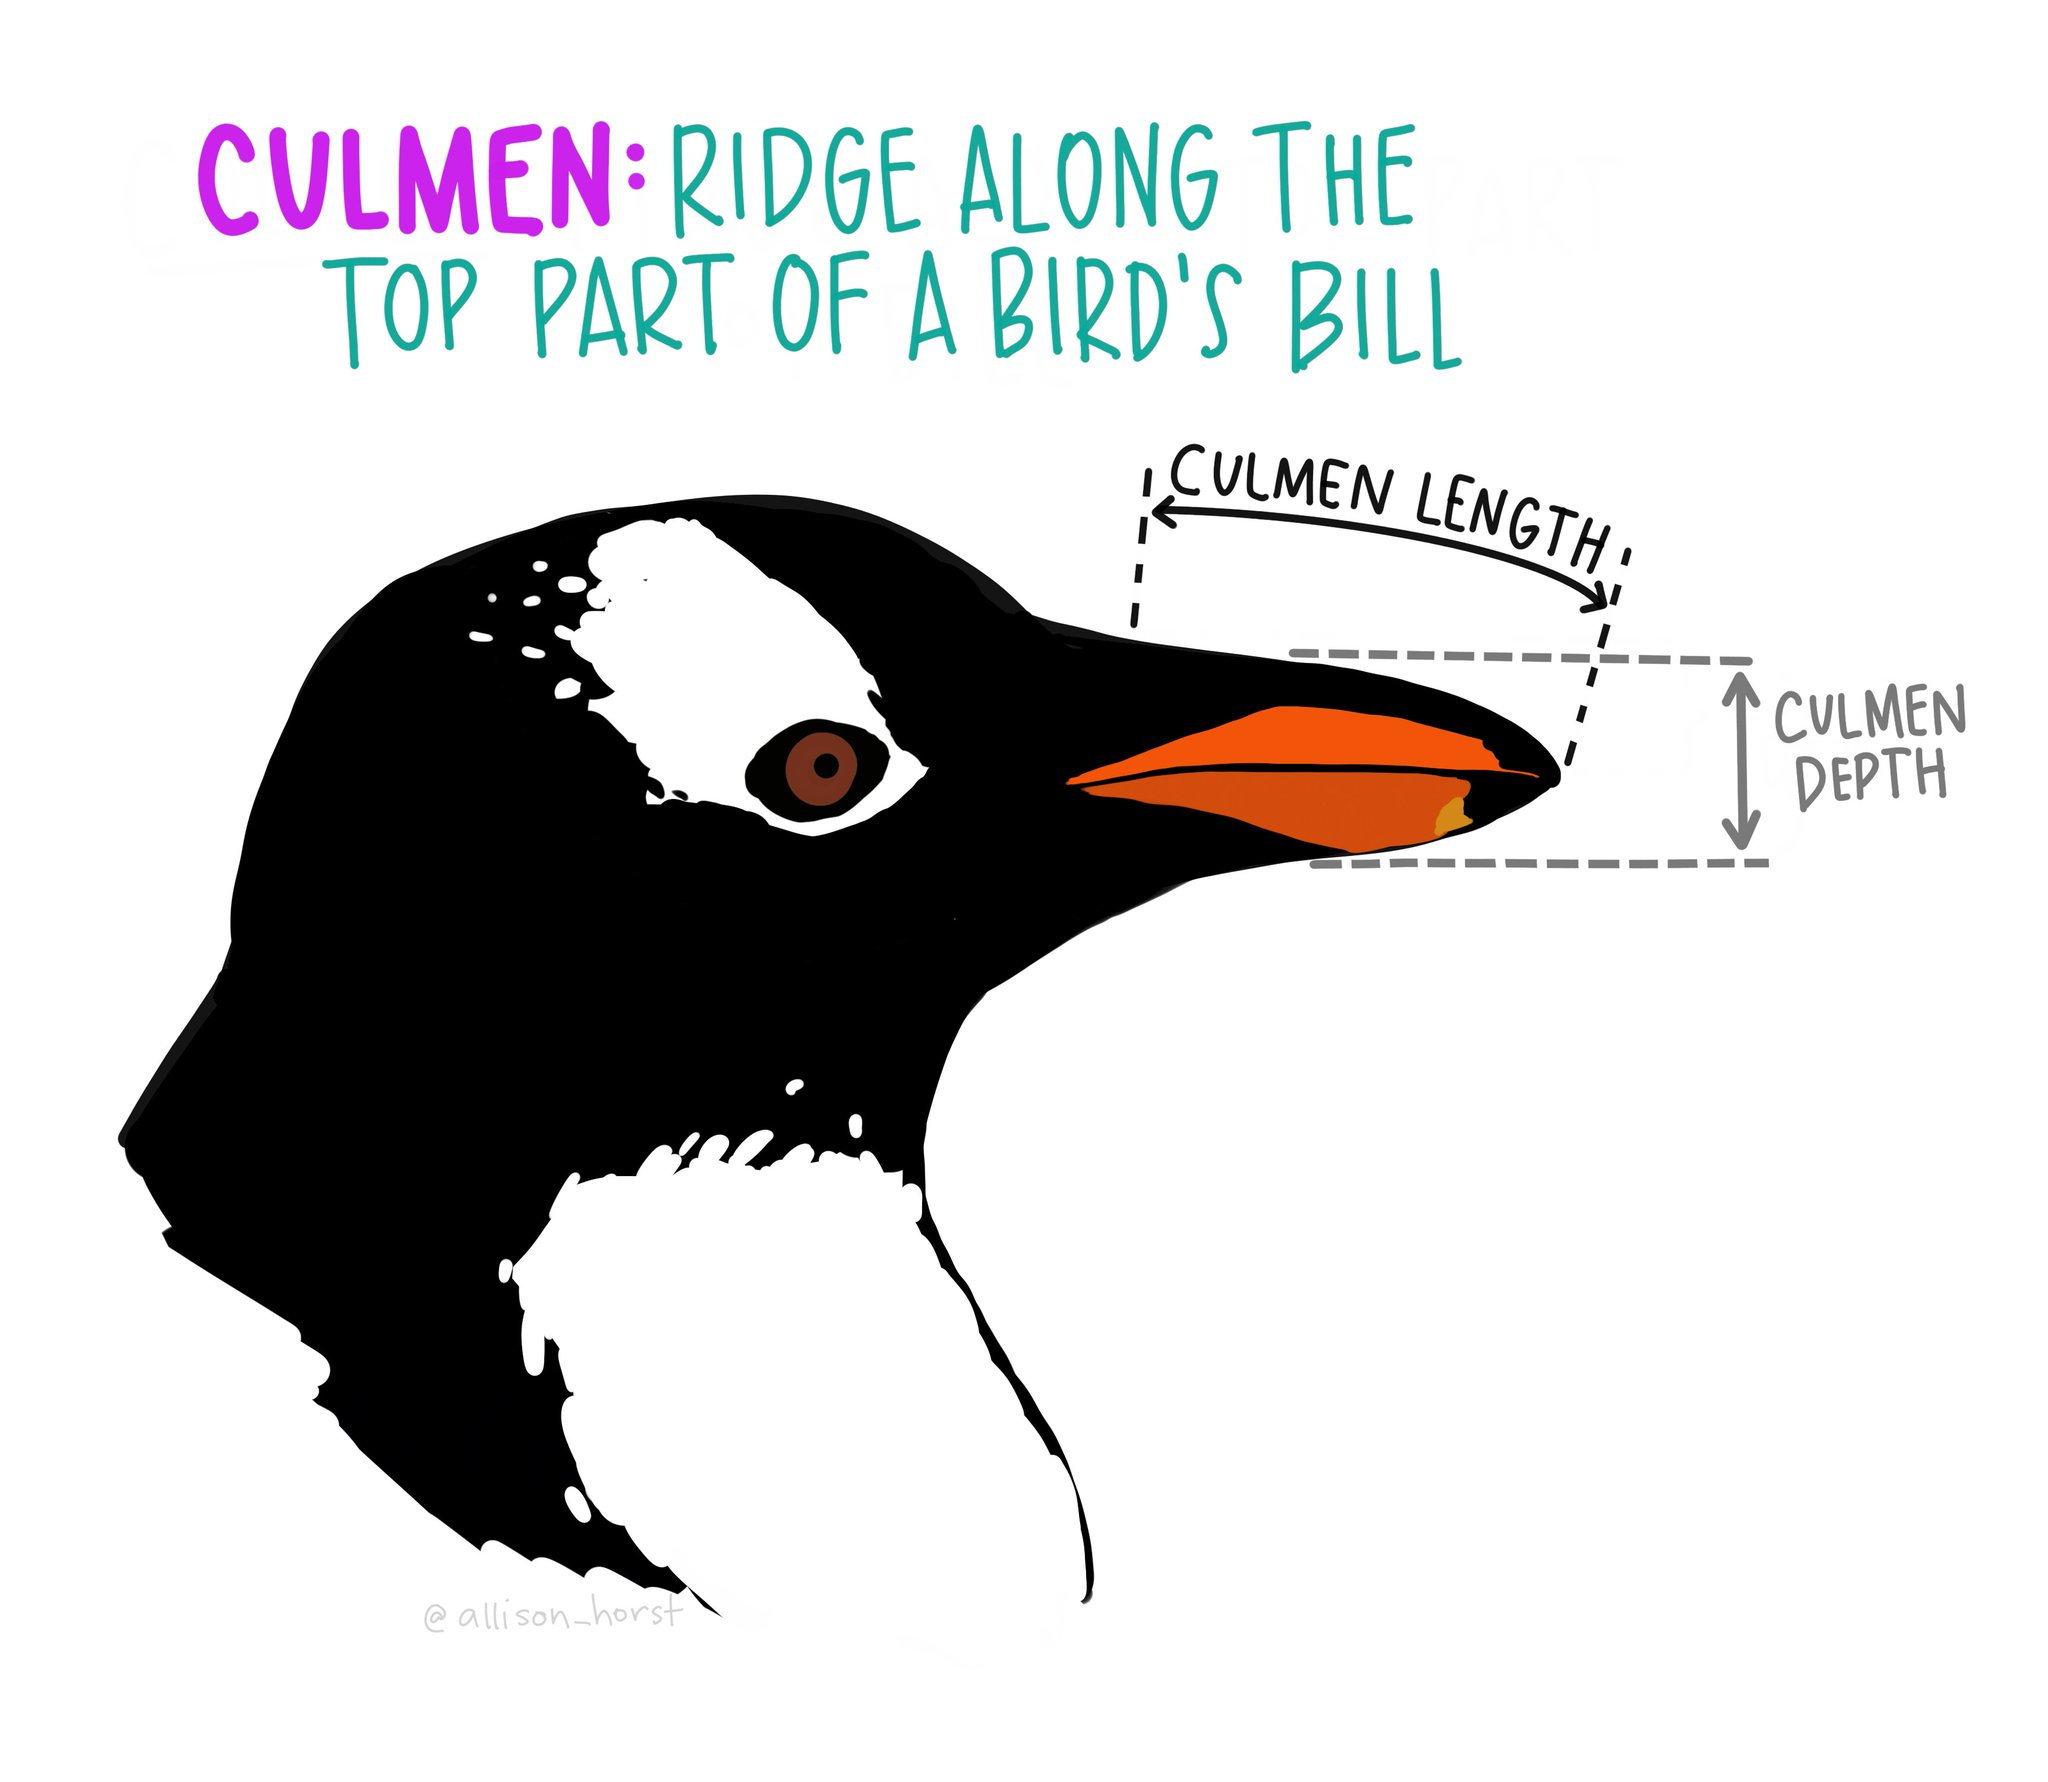

**Pairplot:**

A pairplot is a type of statistical graph used to visualize the relationships between variables in a dataset. It consists of a grid of scatter plots, where each scatter plot displays the relationship between two variables. The diagonal plots display the distribution of each variable, while the off-diagonal plots show the relationship between pairs of variables. Pairplots are useful for identifying correlations, outliers, and patterns in the data, and are often used in exploratory data analysis and data visualization. They can be created using various libraries, such as Seaborn and Matplotlib in Python.

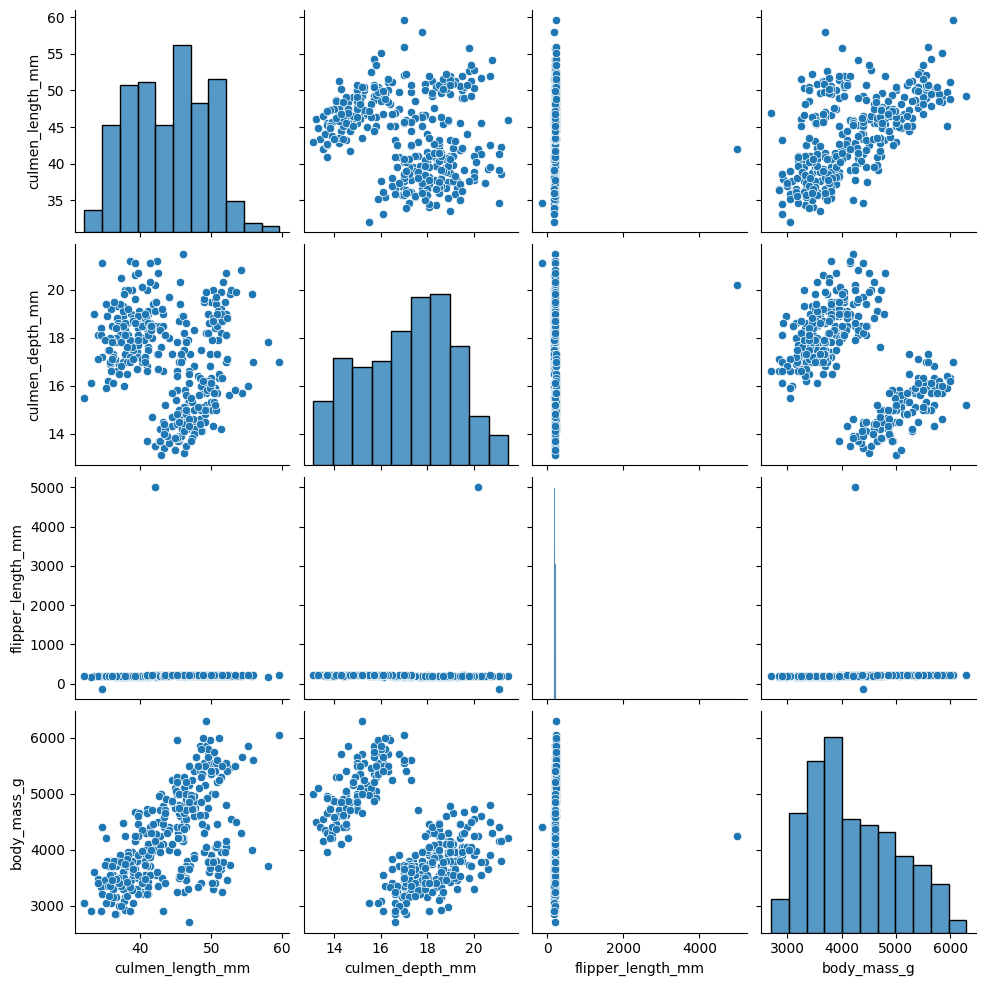

In [ ]:
# Create pairplot to see relationship among features
sns.pairplot(penguins_data)

In [ ]:
penguins_data.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


A histogram is a graphical representation of the distribution of numerical data. It is a type of bar chart that displays the frequency or density of different values in a dataset. Histograms are useful for understanding the shape of the data, including the presence of outliers, skewness, and modality. Each bar in a histogram represents a range of values, and the height of the bar indicates the frequency or density of data points within that range. Histograms are commonly used in statistics, data analysis, and data visualization to summarize and interpret large datasets.

<Axes: xlabel='culmen_depth_mm', ylabel='Count'>

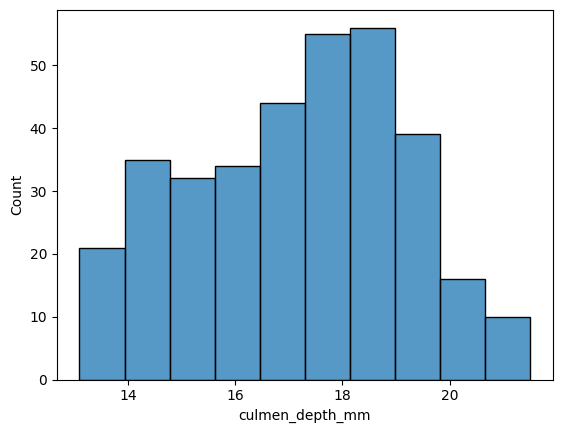

In [ ]:
sns.histplot(penguins_data['culmen_depth_mm'])


**Boxplot:**

A boxplot, also known as a box-and-whisker plot, is a graphical representation of a dataset's distribution. It displays the five-number summary: the minimum value, first quartile (Q1), median (Q2), third quartile (Q3), and maximum value. The box represents the interquartile range (IQR), which is the difference between Q3 and Q1. Whiskers extend to the minimum and maximum values, unless they are outliers. Boxplots are useful for comparing distributions and identifying skewness, outliers, and variability within a dataset. They are commonly used in statistics, data analysis, and scientific research to visualize and interpret data.

<Axes: ylabel='culmen_depth_mm'>

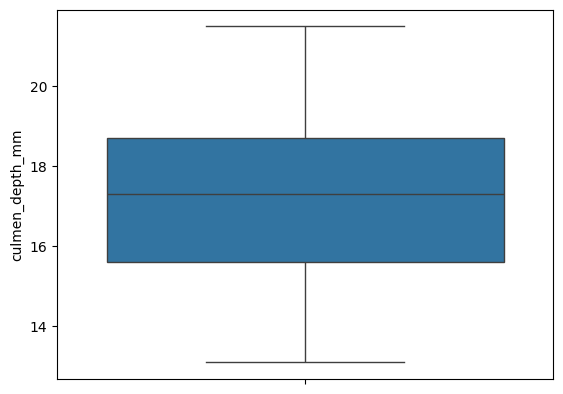

In [ ]:
sns.boxplot(penguins_data['culmen_depth_mm'])


<Axes: xlabel='culmen_length_mm', ylabel='Count'>

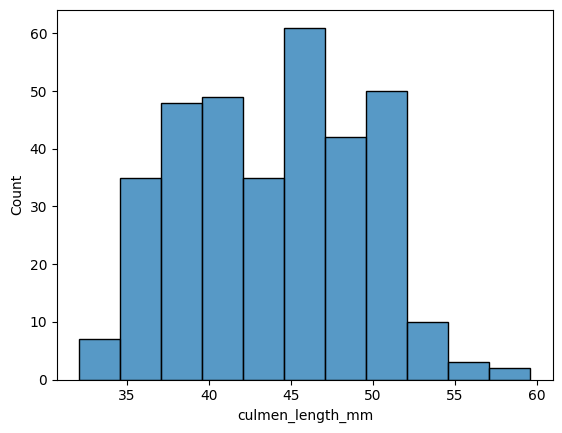

In [ ]:
sns.histplot(penguins_data['culmen_length_mm'])


## Missing Value Imputation

In [ ]:
# Missing value imputation - mean imputation
penguins_data['culmen_length_mm'].fillna(penguins_data['culmen_length_mm'].mean(), inplace=True)
penguins_data['culmen_depth_mm'].fillna(penguins_data['culmen_depth_mm'].mean(), inplace=True)
penguins_data['flipper_length_mm'].fillna(penguins_data['flipper_length_mm'].mean(), inplace=True)
penguins_data['body_mass_g'].fillna(penguins_data['body_mass_g'].mean(), inplace=True)

In [ ]:
penguins_data['sex'].value_counts(normalize=True)


,proportion
sex,
MALE,0.504478
FEMALE,0.492537
.,0.002985


In [ ]:
penguins_data['sex'].value_counts(normalize=True)

,proportion
sex,
MALE,0.504478
FEMALE,0.492537
.,0.002985


## Removing invalid entries

In [ ]:
# Remove invalid entries
penguins_data[penguins_data['sex'] =='.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [ ]:
#drop sex='.' from dataframe
penguins_data = penguins_data[penguins_data['sex'] !='.']

In [ ]:
penguins_data.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,9


## Encoding categorical variables

In [ ]:
# Encode categorical variable
penguins_data = pd.get_dummies(penguins_data, columns=['sex'], drop_first=True)

## Scaling values using StandardScaler

In [ ]:
# Scale values using StandardScaler
penguins_data_scaled = StandardScaler().fit_transform(penguins_data)

## Principal Component Analysis

Principal Component Analysis (PCA) is a widely used statistical technique for dimensionality reduction and feature extraction. It involves transforming a set of correlated variables into a new set of uncorrelated variables, known as principal components, which are ordered by the amount of variance they explain. PCA is often used in data analysis, machine learning, and image processing to:

1. Reduce the number of features in a dataset
2. Identify patterns and correlations
3. Visualize high-dimensional data
4. Improve model interpretability and performance

PCA is a linear transformation that can be used to compress data, while retaining most of the information.

**PCA Explanation:** https://www.ibm.com/think/topics/principal-component-analysis

In [ ]:
#Apply PCA to find principle component

from sklearn.decomposition import PCA
pca = PCA(n_components=None) #let the pca choose top k features


penguins_data_pca = pca.fit(penguins_data_scaled)
penguins_data_pca.explained_variance_ratio_
n_components = sum(penguins_data_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_data_pca = pca.fit_transform(penguins_data_scaled)
print(n_components)

3


## Identify number of clusters

Elbow method using inertia score

Explanation:

num_clusters = [x for x in range(2,11)]: This line creates a list of integers from 2 to 10 (inclusive). This list will be used to test different numbers of clusters for the KMeans algorithm. This is a good range to start with, but you might want to adjust it depending on the size and complexity of your data.

def kmeans_inertias(num_clusters, df_pca):: This defines a function named kmeans_inertias that takes two arguments:

num_clusters: A list of integers representing the different numbers of clusters to try.
df_pca: This is assumed to be the data you've already preprocessed and performed Principal Component Analysis (PCA) on. It should be a pandas DataFrame or a NumPy array.
inertias = []: Initializes an empty list called inertias. This list will store the inertia values for each number of clusters.

for c in num_clusters:: This loop iterates through each number of clusters in the num_clusters list.

km = KMeans(n_clusters=c, random_state=0): Inside the loop, this line creates a KMeans object with n_clusters set to the current value of c. random_state=0 is important for reproducibility; it ensures that the KMeans algorithm will produce the same results each time it's run with the same data and parameters. Without random_state, the results might vary slightly between runs due to the random initialization of cluster centroids.

km.fit(df_pca): This line fits the KMeans model to the data df_pca. The fit method finds the optimal cluster centroids based on the data.

inertias.append(km.inertia_): This line appends the inertia value of the fitted KMeans model to the inertias list. Inertia is the sum of squared distances of samples to their closest cluster center. It's a measure of how internally coherent the clusters are. Lower inertia generally indicates better clustering.

return inertias: After the loop completes, the function returns the inertias list, which contains the inertia values for each number of clusters tested.

**Inertia Score:**

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

What is Inertia?
Inertia, also known as within-cluster sum-of-squares, measures the compactness of clusters. It calculates the total variance within the clusters. In simpler terms, it's the sum of the distances of each data point in a cluster to the centroid of that cluster, squared and summed up for all clusters.

Key Points:

A lower inertia value implies a better model, as it indicates tighter clustering.
However, the inertia metric has a drawback: it keeps decreasing with an increase in the number of clusters ( k ). This is where the "elbow method" is often used to find the optimal ( k ).

**Inertia references:**
1. https://victorleungtw.com/2023/12/16/inertia/
2. https://medium.com/@abolarinwaotun/major-metrics-used-in-clustering-analysis-understanding-the-key-differences-between-inertia-75f739fd2b36

**Elbow method and silhouette score explanation:** https://www.youtube.com/watch?v=wW1tgWtkj4I&t=65s

**Elbow method:**

The Elbow Method is a technique used to determine the optimal number of clusters in a dataset. It is a popular approach in unsupervised machine learning, particularly in K-Means clustering. The method involves plotting the explained variance ratio against the number of clusters (K) and selecting the point at which the curve "elbows," or rapidly increases, indicating that the additional clusters are not improving the model's fit to the data. This point is considered the optimal number of clusters for the given dataset.


In [ ]:
num_clusters = [x for x in range(2,11)]

#Function to compute inertia score for each cluster number
def kmeans_inertias(num_clusters, df_pca):
    inertias = []
    for c in num_clusters:
        km = KMeans(n_clusters=c, random_state=0)
        km.fit(df_pca)
        inertias.append(km.inertia_)
    return inertias

In [ ]:
inertias = kmeans_inertias(num_clusters, penguins_data_pca)
print(inertias)

[963.2943910230158, 659.226828220536, 319.4381893985397, 138.55147053743687, 106.07052392202372, 99.65469571329126, 71.58669292050654, 61.968410271496396, 54.678894908020965]


<Axes: >

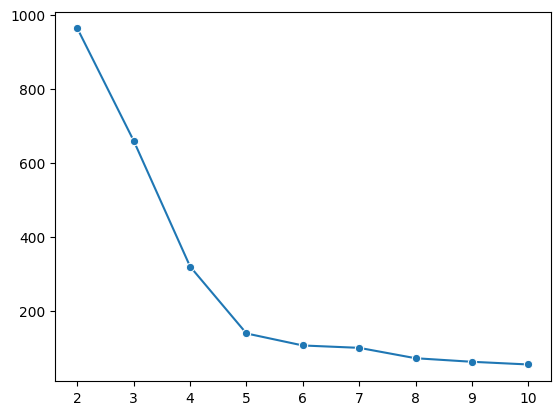

In [ ]:
# Plot inertia vs number of clusters to find the elbow
sns.lineplot(x=num_clusters, y=inertias, marker='o')

The silhouette score is a measure of how well objects in a cluster fit with respect to the other clusters in a dataset. It takes into account both the cohesion within a cluster and the separation between clusters. The score ranges from -1 to 1, where a high score indicates that objects are well clustered, and a low score indicates that objects are poorly clustered. A score close to zero indicates that an object is on the boundary between two or more clusters. The silhouette score is often used in cluster analysis to evaluate the quality of clusters.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters


In [ ]:
# Function to compute silhouette score for each cluster number
def kmeans_silhouette(num_clusters, df_pca):
    sils = []
    for c in num_clusters:
        km = KMeans(n_clusters=c, random_state=0)
        km.fit(df_pca)
        sils.append(silhouette_score(df_pca, km.labels_))
    return sils

In [ ]:
sils = kmeans_silhouette(num_clusters, penguins_data_pca)
print(sils)

[0.4565422139429206, 0.5388374365501898, 0.5486252534188558, 0.648331303442528, 0.5997677485407311, 0.5474116272725109, 0.5138759289719258, 0.5028691561795324, 0.45124518858057455]


<Axes: >

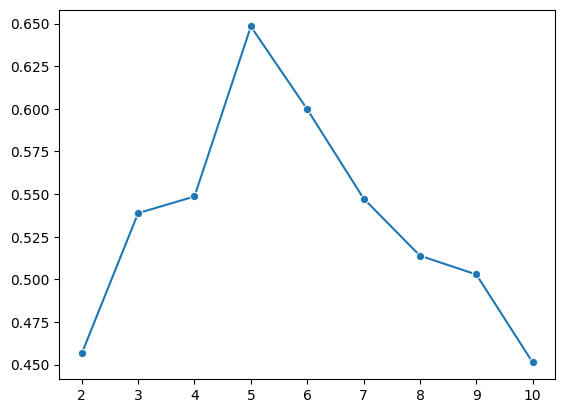

In [ ]:
# Create a graph to plot silhouette scores
sns.lineplot(x=num_clusters, y=sils, marker='o')

## Model Building

In [ ]:
# Run K-Means on N clusters present in data. In this case N=5
kmeans= KMeans(n_clusters=5, random_state=42)
kmeans.fit(penguins_data_pca)

KMeans(n_clusters=5, random_state=42)


**Viridis Color Map:**
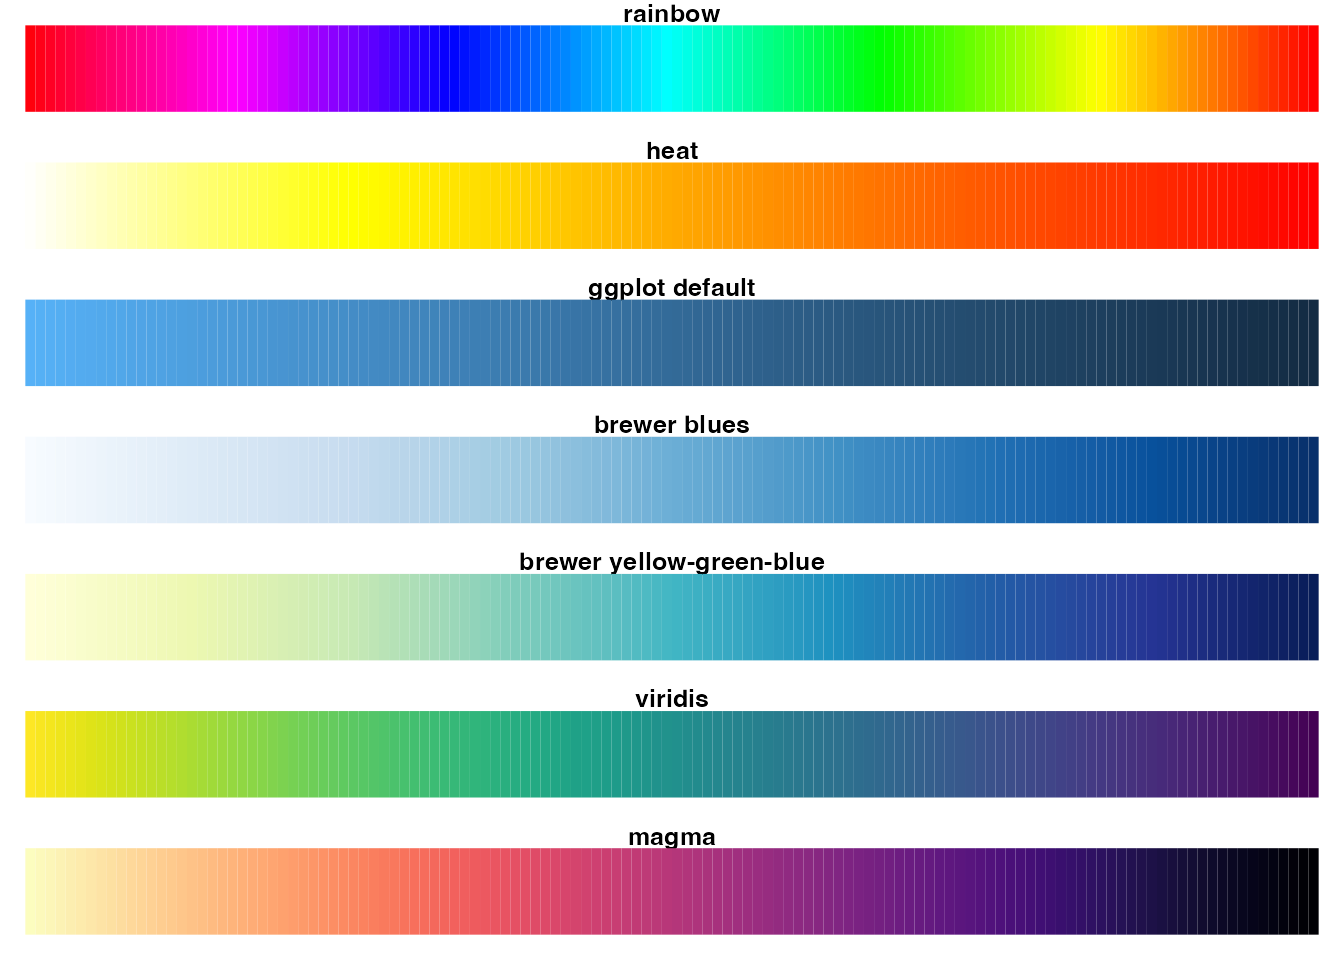

plt.scatter() creates the scatter plot with the first principal component on the x-axis and the second on the y-axis.

c=kmeans.labels_ colors the points based on the cluster labels.

cmap="viridis" sets the color map to viridis.

plt.xlabel() and plt.ylabel() set the axis labels.

plt.title() sets the plot title with the specified format

plt.scatter: This function is used to create a scatter plot.
penguins_data_pca[:, 0] and penguins_data_pca[:, 1]: These are the x and y coordinates of the points to be plotted. The [:, 0] and [:, 1] indexing is used to select the first two principal components from the PCA-transformed data.
c=kmeans.labels_: This specifies the color of each point in the scatter plot, where kmeans.labels_ contains the cluster



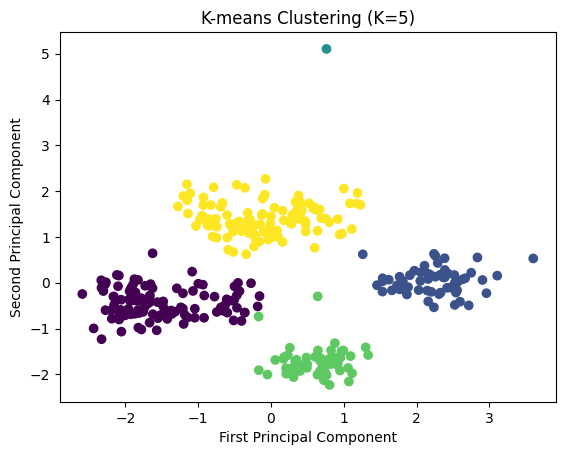

In [ ]:
# Create clusters plot
plt.scatter(penguins_data_pca[:, 0], penguins_data_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={5})")
plt.show()